In [196]:
import numpy as np
import pandas as pd
import scipy as sp

datapath = '../data/insurance_churn/'

churn_data = pd.read_csv(datapath + "autoinsurance_churn.csv")
churn_data.columns = [x.lower() for x in churn_data.columns]
print(f"insurance churn data: {np.sum(churn_data['individual_id'].duplicated == True)} duplicate values for individual ids")

geo_data = pd.read_csv(datapath + "address.csv")
geo_data.columns = [x.lower() for x in geo_data.columns]
print(f"address data: {np.sum(geo_data['address_id'].duplicated == True)} duplicate values for address ids")

custom_data = pd.read_csv(datapath + "customer.csv")
custom_data.columns = [x.lower() for x in custom_data.columns]
print(f"customer data: {np.sum(custom_data['individual_id'].duplicated == True)} duplicate values for individual ids")

demo_data = pd.read_csv(datapath + "demographic.csv")
demo_data.columns = [x.lower() for x in demo_data.columns]
print(f"demographic data: {np.sum(demo_data['individual_id'].duplicated == True)} duplicate values for individual ids")

term_data = pd.read_csv(datapath + "termination.csv")
term_data.columns = [x.lower() for x in term_data.columns]
print(f"termination data: {np.sum(term_data['individual_id'].duplicated == True)} duplicate values for individual ids")

insurance churn data: 0 duplicate values for individual ids
address data: 0 duplicate values for address ids
customer data: 0 duplicate values for individual ids
demographic data: 0 duplicate values for individual ids
termination data: 0 duplicate values for individual ids


In [197]:
## First, fill as many nan's as possible

def intersect_list(ls1, ls2):
    int_vals = [x for x in ls1 if x in ls2]
    int_1 = [id for id in range(len(ls1)) if ls1[id] in ls2]
    int_2 = []
    for x in int_vals:
        int_2.append([id for id, val in enumerate(ls2==x) if val==True])
    return int_vals, int_1, int_2

def intersect_array(ar1, ar2):
    indx_12 = np.isin(ar1, ar2)
    int_vals = ar1[indx_12]
    all_indx_1 = np.arange(len(ar1))
    int_1 = all_indx_1[indx_12]
    int_2 = np.array([np.argwhere(ar2 == ar1[x]) for x in int_1])

def fillnas(df_1, df_2):
    # make sure the first column in df1 has no na's or no duplicates
    cln, junk1, junk2 = intersect_list(df_1.columns, df_2.columns)
    df1 = df_1[cln]
    df2 = df_2[cln]
    ids1 = df1[cln[0]].to_numpy()
    ids2 = df2[cln[0]].to_numpy()
    
    rowids1_na = np.arange(len(ids1))[df1.isna().any(axis=1)]
    ids1_na = ids1[rowids1_na]
    print(f"{len(rowids1_na)} rows have na's")
    df1_na = df1.iloc[rowids1_na]
    
    rowids12_na = []
    for ii in rowids1_na:
        idx = np.argwhere(ids2 == ids1[ii])
        if len(idx) > 0:
            rowids12_na.append(np.argwhere(ids2 == ids1[ii])[0,0])
        if ii//5000 == ii/5000:
            print(f"{ii}/{np.max(rowids1_na)}")
    df2_patch = df2.iloc[rowids12_na]
    
    for cname in cln[1:]:
        isna_2 = df2_patch[cname].notna().to_numpy()
        df1_na.loc[isna_2, cname] = df2_patch.loc[isna_2, cname].values
    
    df1.iloc[rowids1_na] = df1_na
    df_1[cln] = df1
    
    return df_1

In [198]:
## Test the implementation
p = pd.DataFrame({'id': [1,3,5,7,9], 'a': [1,2,3,np.nan,6], 'b': [8,6,np.nan,9,np.nan], 'c': [1,np.nan,5,8,3]})
q = pd.DataFrame({'id': [1,3,5,7,9], 'a': [1,2,3,5,6], 'b': [np.nan,6,np.nan,9,5]})
pq = fillnas(p, q)
pq

3 rows have na's


,id,a,b,c
0,1,1.0,8.0,1.0
1,3,2.0,6.0,NaN
2,5,3.0,NaN,5.0
3,7,5.0,9.0,8.0
4,9,6.0,5.0,3.0


In [199]:
## data purge & exploration
na_b4 = churn_data.isna().sum(axis=1).sum()
churn_data = fillnas(churn_data, geo_data)
na_after = churn_data.isna().sum(axis=1).sum()
print(f"{na_b4-na_after} na values are filled by geography data")

na_b4 = na_after
churn_data = fillnas(churn_data, custom_data)
na_after = churn_data.isna().sum(axis=1).sum()
print(f"{na_b4-na_after} na values are filled by customer data")

na_b4 = na_after
churn_data = fillnas(churn_data, demo_data)
na_after = churn_data.isna().sum(axis=1).sum()
print(f"{na_b4-na_after} na values are filled by demographic data")

264175 rows have na's
15000/1680885
50000/1680885
60000/1680885
75000/1680885
80000/1680885
110000/1680885
180000/1680885
190000/1680885
195000/1680885
200000/1680885
210000/1680885
235000/1680885
265000/1680885
305000/1680885
315000/1680885
335000/1680885
385000/1680885
535000/1680885
555000/1680885
560000/1680885
605000/1680885
625000/1680885
685000/1680885
695000/1680885
725000/1680885
740000/1680885
745000/1680885
770000/1680885
830000/1680885
865000/1680885
895000/1680885
930000/1680885
945000/1680885
950000/1680885
985000/1680885
990000/1680885
995000/1680885
1040000/1680885
1065000/1680885
1080000/1680885
1105000/1680885
1115000/1680885
1120000/1680885
1125000/1680885
1135000/1680885
1180000/1680885
1245000/1680885
1280000/1680885
1300000/1680885
1350000/1680885
1385000/1680885
1395000/1680885
1415000/1680885
1455000/1680885
1460000/1680885
1470000/1680885
1530000/1680885
1565000/1680885
1570000/1680885
1600000/1680885
1610000/1680885
1625000/1680885
1660000/1680885
1670000/1680

In [200]:
# OK anyway, find missing data, some churn customers' data are not in the churn_data
# need to append the missing data
print( np.intersect1d(term_data['individual_id'].to_numpy(), custom_data['individual_id'].to_numpy()).shape[0], 
       np.intersect1d(term_data['individual_id'].to_numpy(), demo_data['individual_id'].to_numpy()).shape[0] )

# First, drop the geo data
churn_data_nogeo = churn_data.drop(['address_id','latitude','longitude','city','state','county'], axis=1)
#print(churn_data_nogeo.dtypes)

missing_ids = term_data['individual_id'][np.isin(term_data['individual_id'], churn_data['individual_id'], invert=True)].to_numpy()
churn_demo_columns = np.intersect1d(np.array(churn_data_nogeo.columns), np.array(demo_data.columns))
churn_custom_columns = np.intersect1d(np.array(churn_data_nogeo.columns), np.array(custom_data.columns))
churn_term_columns = np.intersect1d(np.array(churn_data_nogeo.columns), np.array(term_data.columns))
churn_demo_columns = np.delete(churn_demo_columns, churn_demo_columns=='individual_id')
churn_custom_columns = np.delete(churn_custom_columns, churn_custom_columns=='individual_id')
churn_term_columns = np.delete(churn_term_columns, churn_term_columns=='individual_id')

added_ids = np.intersect1d(np.intersect1d(missing_ids, custom_data['individual_id'].to_numpy()), demo_data['individual_id'].to_numpy())
print(added_ids.size)

df_add = pd.DataFrame({'individual_id': added_ids})
added = demo_data[churn_demo_columns].loc[demo_data['individual_id'].isin(added_ids)]
for ii in range(added.shape[1]):
    df_add.insert(len(df_add.columns), added.columns[ii], added.values[:,ii])
added = custom_data[churn_custom_columns].loc[custom_data['individual_id'].isin(added_ids)]
for ii in range(added.shape[1]):
    df_add.insert(len(df_add.columns), added.columns[ii], added.values[:,ii])
added = term_data[churn_term_columns].loc[term_data['individual_id'].isin(added_ids)]
for ii in range(added.shape[1]):
    df_add.insert(len(df_add.columns), added.columns[ii], added.values[:,ii])
df_add.insert(len(df_add.columns), 'churn', 1)
print(df_add.shape, added_ids.size)  

churn_data_nogeo_allchurn = pd.concat([churn_data_nogeo, df_add], ignore_index=True)
print(churn_data_nogeo_allchurn.head(5))

269259 249265
55809
(55809, 16) 55809
   individual_id curr_ann_amt days_tenure cust_orig_date age_in_years  \
0   2.213000e+11   818.877997      1454.0     2018-12-09           44   
1   2.213001e+11   974.199182      1795.0     2018-01-02           72   
2   2.213007e+11   967.375112      4818.0     2009-09-23           55   
3   2.213016e+11   992.409561       130.0     2022-07-25           53   
4   2.213016e+11   784.633494      5896.0     2006-10-11           50   

  date_of_birth    income has_children length_of_residence marital_status  \
0    1978-06-23   22500.0          1.0                15.0        Married   
1    1950-05-30   27500.0          0.0                 2.0         Single   
2    1967-07-07   42500.0          0.0                10.0        Married   
3    1969-05-25  125000.0          1.0                 6.0        Married   
4    1972-09-25   87500.0          1.0                 4.0        Married   

  home_market_value home_owner college_degree good_credit ac

In [201]:
## OK, some unchurned customers are missing, let's add it
missing_ids = demo_data['individual_id'].loc[demo_data['individual_id'].isin(custom_data['individual_id'])].to_numpy()
added_ids = missing_ids[np.isin(missing_ids, churn_data_nogeo_allchurn['individual_id'], invert=True)]
print(f"{added_ids.shape[0]} ids to be added.")

df_added = pd.DataFrame({'individual_id': added_ids})
added = demo_data[churn_demo_columns].loc[demo_data['individual_id'].isin(added_ids)]
for cln in churn_demo_columns:
    df_added.insert(df_added.shape[1], cln, added[cln])
print(df_added.shape)

added = custom_data[churn_custom_columns].loc[custom_data['individual_id'].isin(added_ids)]
for cln in churn_custom_columns:
    df_added.insert(df_added.shape[1], cln, added[cln])
print(df_added.shape)

df_added.insert(df_added.shape[1], 'acct_suspd_date', np.nan)
df_added.insert(df_added.shape[1], 'churn', 0)
print(df_added.shape, churn_data_nogeo_allchurn.shape)

split_point_2 = churn_data_nogeo_allchurn.shape[0]

churn_data_nogeo_all = pd.concat([churn_data_nogeo_allchurn, df_added], ignore_index=True)

375837 ids to be added.
(375837, 9)
(375837, 14)
(375837, 16) (1736718, 16)


In [202]:
print(f"Totally {churn_data_nogeo_all.shape[0]} customers")
print(f"{churn_data_nogeo_all['churn'].sum()} customers churned")
print(f"{np.arange(churn_data_nogeo_all.shape[0])[churn_data_nogeo_all.isna().sum(axis=1) > 0].size} customers have missing data")

Totally 2112555 customers
249265 customers churned
1931195 customers have missing data


In [203]:
## Check whether 'cust_orig_date' + 'days_tenure' = 'acct_suspd_date' or 'today' if no churn
churn_data_nogeo_all = pd.concat([churn_data_nogeo_allchurn, df_added], ignore_index=True)

from datetime import datetime, timedelta
idx = 0
Begindate = datetime.strptime(churn_data_nogeo_all['cust_orig_date'][idx], "%Y-%m-%d") 
Enddate = Begindate + timedelta(days=churn_data_nogeo_all['days_tenure'][idx])
#Suspdate = datetime.strptime(churn_data_nogeo_all['acct_suspd_date'][idx], "%Y-%m-%d") 

today = Enddate.date()

churn_data_nogeo_all['acct_suspd_date'] = churn_data_nogeo_all['acct_suspd_date'].fillna(str(today))
print(f"{np.arange(churn_data_nogeo_all.shape[0])[churn_data_nogeo_all.isna().sum(axis=1) > 0].size} customers have missing data")

df_churn = churn_data_nogeo_all.drop('individual_id', axis=1)
print(df_churn.head(5))

523932 customers have missing data
  curr_ann_amt days_tenure cust_orig_date age_in_years date_of_birth  \
0   818.877997      1454.0     2018-12-09           44    1978-06-23   
1   974.199182      1795.0     2018-01-02           72    1950-05-30   
2   967.375112      4818.0     2009-09-23           55    1967-07-07   
3   992.409561       130.0     2022-07-25           53    1969-05-25   
4   784.633494      5896.0     2006-10-11           50    1972-09-25   

     income has_children length_of_residence marital_status home_market_value  \
0   22500.0          1.0                15.0        Married     50000 - 74999   
1   27500.0          0.0                 2.0         Single     50000 - 74999   
2   42500.0          0.0                10.0        Married     75000 - 99999   
3  125000.0          1.0                 6.0        Married   175000 - 199999   
4   87500.0          1.0                 4.0        Married   225000 - 249999   

  home_owner college_degree good_credit acct_

In [204]:
df_churn = churn_data_nogeo_all.drop('individual_id', axis=1)
print(f"Totally {df_churn.shape[0]} customers")

# Update days_tenure
churn_idx = np.arange(df_churn.shape[0])[df_churn['churn'] == 1]
for idx in churn_idx:
    Enddate = datetime.strptime(df_churn['acct_suspd_date'][idx], "%Y-%m-%d") 
    Begindate = datetime.strptime(df_churn['cust_orig_date'][idx], "%Y-%m-%d") 
    Birthdate = datetime.strptime(df_churn['date_of_birth'][idx], "%Y-%m-%d") 
    days_int = (Enddate - Begindate).days
    years_age = (Enddate - Birthdate).days/365
    if days_int > 0:
        df_churn.loc[idx, 'days_tenure'] = days_int  
        df_churn.loc[idx, 'age_in_years'] = years_age
    else:
        df_churn.loc[idx, 'churn'] = 0
        df_churn.loc[idx, 'acct_suspd_date'] = str(today)

print(f"Totally {df_churn.shape[0]} customers")
print(f"{df_churn['churn'].sum()} customers churned")
df_churn_v1 = df_churn

## OK now first drop all missing values
df_churn_v1.dropna(inplace=True)
print(f"Totally {df_churn_v1.shape[0]} customers")
print(f"{df_churn_v1['churn'].sum()} customers churned")

Totally 2112555 customers
Totally 2112555 customers
172750 customers churned
Totally 1588623 customers
128857 customers churned


Totally 2112555 customers
249265 customers churned
Totally 2036040 customers
172750 customers churned


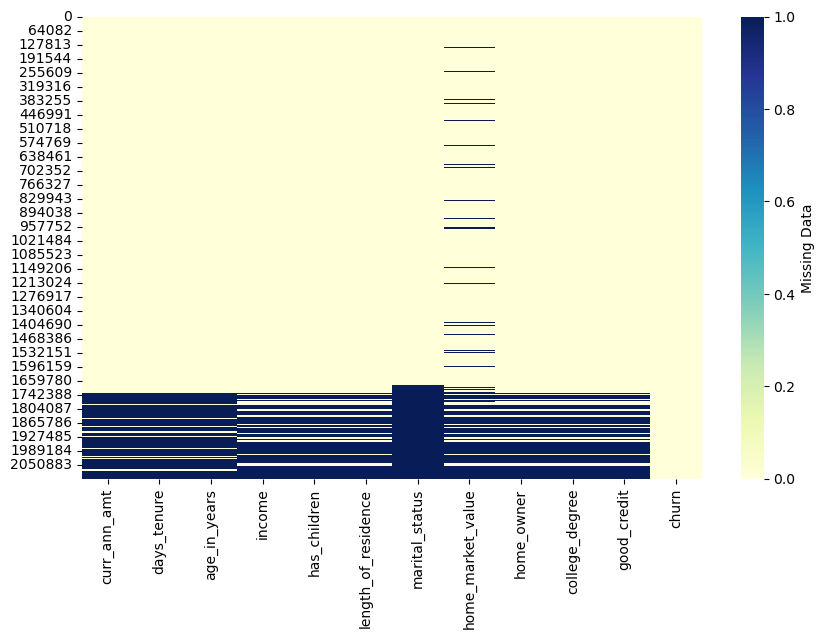

In [205]:
# Or, drop the customers who churned away and returned
df_churn = churn_data_nogeo_all.drop('individual_id', axis=1)
print(f"Totally {df_churn.shape[0]} customers")

# Update days_tenure
churn_idx = np.arange(df_churn.shape[0])[df_churn['churn'] == 1]
idx_return = []
for idx in churn_idx:
    Enddate = datetime.strptime(df_churn['acct_suspd_date'][idx], "%Y-%m-%d") 
    Begindate = datetime.strptime(df_churn['cust_orig_date'][idx], "%Y-%m-%d") 
    Birthdate = datetime.strptime(df_churn['date_of_birth'][idx], "%Y-%m-%d") 
    days_int = (Enddate - Begindate).days
    years_age = (Enddate - Birthdate).days/365
    if days_int > 0:
        df_churn.loc[idx, 'days_tenure'] = days_int  
        df_churn.loc[idx, 'age_in_years'] = years_age
    else:
        idx_return.append(idx)

print(f"{df_churn['churn'].sum()} customers churned")
df_churn_v2 = df_churn.drop((idx_return), axis=0)

print(f"Totally {df_churn_v2.shape[0]} customers")
print(f"{df_churn_v2['churn'].sum()} customers churned")

df_churn_v2.drop(['cust_orig_date', 'date_of_birth', 'acct_suspd_date'], axis=1, inplace=True)

# Look at missing data map
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_churn_v2.isna(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.show()

In [206]:
## Now perform feature transformation
marital = df_churn_v2['marital_status']
df_churn_v2['marital_status'] = marital.map({'Married': 1, 'Single': 0})
df_churn_v2['home_market_value'].unique()
hp = df_churn_v2['home_market_value']
df_churn_v2['home_market_value'] = hp.map({'1000 - 24999': 0, '25000 - 49999': 1, '50000 - 74999': 2, '75000 - 99999': 3, '100000 - 124999': 4,
                                           '125000 - 149999': 5, '150000 - 174999': 6, '175000 - 199999': 7, '200000 - 224999': 8,
                                           '225000 - 249999': 9, '250000 - 274999': 10, '275000 - 299999': 11, '300000 - 349999': 12,
                                           '350000 - 399999': 13, '400000 - 449999': 14, '450000 - 499999': 15, '500000 - 749999': 16,
                                           '750000 - 999999': 17, '1000000 Plus': 18})

In [207]:
## OK now first drop all missing values
df_churn_v2.dropna(inplace=True)
print(f"Totally {df_churn_v2.shape[0]} customers")
print(f"{df_churn_v2['churn'].sum()} customers churned")

# Final dispositions:
log_columns = ['curr_ann_amt', 'days_tenure', 'age_in_years', 'income']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df_churn_v2['churn']
X = df_churn_v2.drop('churn', axis=1)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Build a logistic regression 
logit = LogisticRegression(penalty='l2', C=100, random_state=42, warm_start=True, verbose=1)
logit.fit(X_train, y_train)

print(df_churn_v2.head(3))
print(logit.coef_[0], logit.intercept_)

Totally 1536120 customers
128857 customers churned
(1536120, 11)
  curr_ann_amt days_tenure age_in_years   income has_children  \
0   818.877997      1454.0           44  22500.0          1.0   
1   974.199182      1795.0           72  27500.0          0.0   
2   967.375112      4818.0           55  42500.0          0.0   

  length_of_residence  marital_status  home_market_value home_owner  \
0                15.0             1.0                2.0        1.0   
1                 2.0             0.0                2.0        1.0   
2                10.0             1.0                3.0        1.0   

  college_degree good_credit  churn  
0            1.0         1.0      0  
1            0.0         0.0      0  
2            0.0         0.0      0  
[-8.17320473e-04 -1.65200007e-04 -1.35223145e-02 -6.71502825e-07
 -6.68195660e-03 -1.20409498e-02  6.58508315e-04 -2.78385676e-02
 -4.69526978e-03 -2.43259768e-03 -7.01627400e-03] [-0.00989081]


C:\Users\hychy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: ylabel='Frequency'>

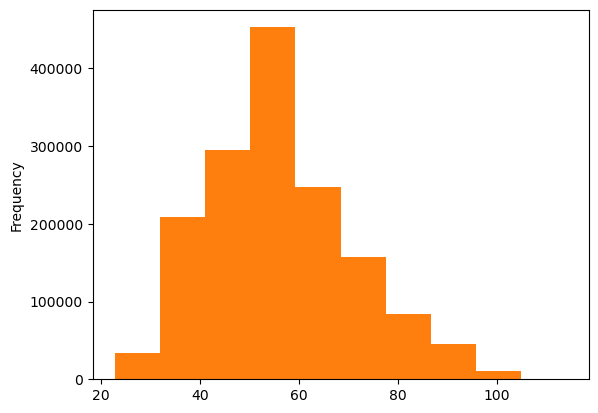

In [227]:
df_churn_only = df_churn_v2[df_churn_v2['churn'] == 1]
df_churn_only.head(5)
df_churn_only['age_in_years'].plot.hist()
df_churn_v2['age_in_years'].plot.hist()

In [168]:
## Now use statsmodels to do the regression
import statsmodels as sm
import statsmodels.api as sma
import statsmodels.formula.api as smfa

endog_ = y_train.to_numpy(np.float32)
exog_ = sma.add_constant(X_train.to_numpy(np.float32))

dt_train = X_train
dt_train['churn'] = y_train

#lgt = smfa.logit('', dt_train)
lgt = sma.Logit(endog_, exog_)
lgt.fit_regularized(method='l1', maxiter='defined_by_method', alpha=0.01)

C:\Users\hychy\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\hychy\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5073551698606837e-08
            Iterations: 3
            Function evaluations: 24
            Gradient evaluations: 3


C:\Users\hychy\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 13 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hychy\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


LinAlgError: Singular matrix